# Econometrics Data Analysis
**Aim**
Figure out ways to solve the following sections in web App 
* Quick Facts
* World at a Glance
* Popular & Unpopular Section
* In-depth Analysis of Each country
* Extra features
  * Outlier Detection to figure out countries with odd fortunes in popular indicators
  * Neural Network Detection for prediction future GDP or other important indicator ()
  
-----------Visualizations----------------
* Make visualization template functions and re-reun the notebook to save the pictures

In [3]:
# Import 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as mpl

In [4]:
# source
source =  "./dataset/world_bank_indicators/WDI_csv/WDIData.csv"

In [5]:
# ACTIONS 
# have the column names defined in a dictionary to avoid copy pastes
indicator_name="Indicator Name" 
indicator_code="Indicator Code"
country="Country Name"
country_code="Country Code" 
    


In [6]:
# Reading the CSV
df = pd.read_csv(source)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN,NaN


In [7]:
# Countries Mask 
import json 
countries_only_path = "./queries/countriesOnlyIds.json"
with open(countries_only_path) as fp:
    json_data = fp.read()
    countries_only_dict = json.loads(json_data, encoding="utf-8")

country_only_mask = df["Country Code"].isin(countries_only_dict)

### Countries Only IDs

In [8]:
country_names = df[country_only_mask][country].unique()
country_name_to_ids = {}
for country_name in country_names:
    country_mask = df[country] == country_name
    country_id = df[country_mask][country_code].unique()[0]
    country_name_to_ids[country_id] = country_name

In [9]:
country_name_to_ids

{'AFG': 'Afghanistan',
 'ALB': 'Albania',
 'DZA': 'Algeria',
 'ASM': 'American Samoa',
 'AND': 'Andorra',
 'AGO': 'Angola',
 'ATG': 'Antigua and Barbuda',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ABW': 'Aruba',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BHS': 'Bahamas, The',
 'BHR': 'Bahrain',
 'BGD': 'Bangladesh',
 'BRB': 'Barbados',
 'BLR': 'Belarus',
 'BEL': 'Belgium',
 'BLZ': 'Belize',
 'BEN': 'Benin',
 'BMU': 'Bermuda',
 'BTN': 'Bhutan',
 'BOL': 'Bolivia',
 'BIH': 'Bosnia and Herzegovina',
 'BWA': 'Botswana',
 'BRA': 'Brazil',
 'VGB': 'British Virgin Islands',
 'BRN': 'Brunei Darussalam',
 'BGR': 'Bulgaria',
 'BFA': 'Burkina Faso',
 'BDI': 'Burundi',
 'CPV': 'Cabo Verde',
 'KHM': 'Cambodia',
 'CMR': 'Cameroon',
 'CAN': 'Canada',
 'CYM': 'Cayman Islands',
 'CAF': 'Central African Republic',
 'TCD': 'Chad',
 'CHI': 'Channel Islands',
 'CHL': 'Chile',
 'CHN': 'China',
 'COL': 'Colombia',
 'COM': 'Comoros',
 'COD': 'Congo, Dem. Rep.',
 'COG': 'Congo, Rep.',
 'CRI

In [10]:
import json
with open("./queries/COUNTRIES_ONLY_CODE_TO_NAME.json", "w") as fp:
    json.dump(country_name_to_ids, fp)

In [11]:
# Years mask 
years = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']

## Quick Facts
What could be the some important indicator that are worth displaying?
* Possible Indicators
    * Gender ()
    * GDP growth (%annual Income)
    * Inflation ?
Is there enough data for thee facts to be correct?


In [12]:
series_names = pd.Series(df[indicator_name].unique())
series_contains_gender = series_names.str.contains(r'gender')
gender_indices = np.nonzero(series_contains_gender.to_numpy())
series_names[gender_indices[0]]

269         CPIA gender equality rating (1=low to 6=high)
704     Literacy rate, youth (ages 15-24), gender pari...
1199    School enrollment, primary (gross), gender par...
1200    School enrollment, primary and secondary (gros...
1208    School enrollment, secondary (gross), gender p...
1215    School enrollment, tertiary (gross), gender pa...
dtype: object

***Gender Indicators***
* CPIA Gender Equality -> Asseses the extent to which the country has institutions promoting and enforcing gender laws (in education, health, economy, etc. )

* Labor force, female (% of total labor force) -> Assess how much of the female population is actively listed in the working population

* School enrollment, secondary, female (% gross) -> Assess the percentage of female population enrolling in secondary education

**The above listed three indicators could be used for the Gender Section of Quick Facts**


The Labor force indicator has been obtained by a quick search across the World Bank website

In [13]:
# The Series Ids for these indicators 
gender_required_indicators = [
    'CPIA gender equality rating (1=low to 6=high)', 
    'Labor force, female (% of total labor force)',
    'School enrollment, secondary (gross), gender parity index (GPI)'    
]

In [14]:
gender_requried_mask = df[indicator_name].isin(gender_required_indicators)
gender_indicators_array = list(df[gender_requried_mask][indicator_code].unique())
gender_indicators_array

['IQ.CPA.GNDR.XQ', 'SL.TLF.TOTL.FE.ZS', 'SE.ENR.SECO.FM.ZS']

In [15]:
# Mask for Series Names 
# Gender Indicator 1
gender_indicator_1_mask = df[indicator_name] == gender_required_indicators[0]
df_gender_indicator_1 = df[gender_indicator_1_mask & country_only_mask] # Countries with only these indicators
df_gender_indicator_1 = df_gender_indicator_1.set_index(country)

In [16]:
# Find the largest positive and negative change in the last two years
last_two_years = years[-2:]
last_two_years_nan = df_gender_indicator_1[last_two_years].isna()
last_two_years_no_nan = ~(last_two_years_nan["2018"] & last_two_years_nan["2019"])

In [17]:
# Nan Clearing
df_gender_indicator_1_non_nan = df_gender_indicator_1[last_two_years_no_nan][last_two_years]
df_gender_indicator_1_non_nan["change_last_two_years"] = df_gender_indicator_1_non_nan["2019"] - df_gender_indicator_1_non_nan["2018"]
change_last_two_years = df_gender_indicator_1_non_nan["change_last_two_years"]
max_values = change_last_two_years.apply(lambda x: x==0.5)
max_indices = np.nonzero(max_values.to_numpy())
df_gender_indicator_1_non_nan.iloc[max_indices[0]]

,2018,2019,change_last_two_years
Country Name,,,
Kiribati,2.5,3.0,0.5
"Micronesia, Fed. Sts.",2.5,3.0,0.5
Togo,3.0,3.5,0.5


In [18]:
# World Average 
world_mask = df[country_code] == "WLD"
world_gender_indicator_1 = df[gender_indicator_1_mask & world_mask][last_two_years]
world_gender_indicator_1["change_last_two_years"] = world_gender_indicator_1["2019"] - world_gender_indicator_1["2018"]
world_gender_indicator_1

,2018,2019,change_last_two_years
66279,3.239726,3.253333,0.013607


In [19]:
# Number of countries with reported values for CPIA Gender Equality 
df_gender_indicator_1_non_nan.shape # 75 countries with data

(75, 3)

**Quick Fact 1**:
Out of the 75 countries that have reported data on CPIA Gender Equality, Kiribari, Micronesia and Togo hav seen the highest positive change increasing of 0.5. These oceanic countries have seen a spike these recent years. The biggest gainer is Togo whose CPIA grew from 3.0 to 3.5 while that of Kiribati and Microesia increased from 2.5 to 3.0. 

**World Average** is positive increase of 0.013 from 3.239 to 3.25

**The reports have not seen any decrease**

In [20]:
# Mask for Gender indicator 2
gender_indicator_2_mask = df[indicator_name] == gender_required_indicators[1]
df_gender_indicator_2 = df[gender_indicator_2_mask & country_only_mask] # Countries with only these indicators
df_gender_indicator_2 = df_gender_indicator_2.set_index(country)

In [21]:
# Nan Cleaning
df_gender_indicator_2_non_nan = df_gender_indicator_2[last_two_years_no_nan][last_two_years]
df_gender_indicator_2_non_nan["change_last_two_years"] = df_gender_indicator_2_non_nan["2019"] - df_gender_indicator_2_non_nan["2018"]
change_last_two_years = df_gender_indicator_2_non_nan["change_last_two_years"]

In [22]:
# Finding the highest positive change
last_two_years_nan = df_gender_indicator_2[last_two_years].isna()
last_two_years_no_nan = ~(last_two_years_nan["2018"] & last_two_years_nan["2019"])

In [23]:
# Find the maximum change 
max_values = change_last_two_years.apply(lambda x: x==change_last_two_years.max())
max_indices = np.nonzero(max_values.to_numpy())
df_gender_indicator_2_non_nan.iloc[max_indices[0]]

,2018,2019,change_last_two_years
Country Name,,,
St. Lucia,47.423574,48.468342,1.044769


In [24]:
# Find the minimum 
change_min = change_last_two_years.min()
min_values = change_last_two_years.apply(lambda x: x == change_min)
min_indices = np.nonzero(min_values.to_numpy())
df_gender_indicator_2_non_nan.iloc[min_indices[0]]

,2018,2019,change_last_two_years
Country Name,,,
Maldives,21.112317,20.154893,-0.957424


In [25]:
# World Average 
world_mask = df[country_code] == "WLD"
world_gender_indicator_2 = df[gender_indicator_2_mask & world_mask][last_two_years]
world_gender_indicator_2["change_last_two_years"] = world_gender_indicator_2["2019"] - world_gender_indicator_2["2018"]
world_gender_indicator_2

,2018,2019,change_last_two_years
66694,38.858304,38.883095,0.024791


**Quick Fact 2**
* The country of Costa Rica has seen the highest growth in female labor force of 1.63% increasing from 38.8% to 40.5%.
* The country with the greatest decline in this specific indicator is Venezuela whose -1.25% decline decrease the active female labor force from 38.46% to 37.22% of female population
* World Average - +ve 0.024%

In [26]:
# Mask for Gender indicator 3
gender_indicator_3_mask = df[indicator_name] == gender_required_indicators[2]
df_gender_indicator_3 = df[gender_indicator_3_mask & country_only_mask] # Countries with only these indicators
df_gender_indicator_3 = df_gender_indicator_3.set_index(country)
df_gender_indicator_3.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,"School enrollment, secondary (gross), gender p...",SE.ENR.SECO.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.55749,0.55226,0.55640,0.55790,0.57128,0.56842,0.57098,NaN,NaN,NaN
Albania,ALB,"School enrollment, secondary (gross), gender p...",SE.ENR.SECO.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.97586,0.95973,0.94445,0.95622,0.97086,0.98903,1.00539,1.01136,NaN,NaN
Algeria,DZA,"School enrollment, secondary (gross), gender p...",SE.ENR.SECO.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,ASM,"School enrollment, secondary (gross), gender p...",SE.ENR.SECO.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,"School enrollment, secondary (gross), gender p...",SE.ENR.SECO.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Nan Cleaning
df_gender_indicator_3_non_nan = df_gender_indicator_3[last_two_years_no_nan][last_two_years]
df_gender_indicator_3_non_nan["change_last_two_years"] = df_gender_indicator_3_non_nan["2019"] - df_gender_indicator_3_non_nan["2018"]
change_last_two_years = df_gender_indicator_3_non_nan["change_last_two_years"]

In [28]:
# Find the maximum change 
max_values = change_last_two_years.apply(lambda x: x==change_last_two_years.max())
max_indices = np.nonzero(max_values.to_numpy())
df_gender_indicator_3_non_nan.iloc[max_indices[0]]

,2018,2019,change_last_two_years
Country Name,,,
Burundi,1.11448,1.15231,0.03783


In [29]:
# Find the minimum 
change_min = change_last_two_years.min()
min_values = change_last_two_years.apply(lambda x: x == change_min)
min_indices = np.nonzero(min_values.to_numpy())
df_gender_indicator_3_non_nan.iloc[min_indices[0]]

,2018,2019,change_last_two_years
Country Name,,,
Malawi,0.98213,0.83048,-0.15165


In [30]:
# World average 
world_mask = df[country_code] == "WLD"
world_gender_indicator_3 = df[gender_indicator_3_mask & world_mask][last_two_years]
world_gender_indicator_3["change_last_two_years"] = world_gender_indicator_3["2019"] - world_gender_indicator_3["2018"]
world_gender_indicator_3

,2018,2019,change_last_two_years
67218,0.99104,0.99192,0.00088


In [31]:
# World highest 
indicator_3_2019 = df[gender_indicator_3_mask & country_only_mask].set_index(country)["2019"]
indicator_3_max_2019 = indicator_3_2019.max()
indices_indicator_3_max = np.nonzero(indicator_3_2019.apply(lambda x: x==indicator_3_max_2019 ).to_numpy())
indicator_3_2019.iloc[indices_indicator_3_max[0]]

Country Name
Tuvalu    1.33158
Name: 2019, dtype: float64

In [32]:
# World lowest 
indicator_3_2019 = df[gender_indicator_3_mask & country_only_mask].set_index(country)["2019"]
indicator_3_max_2019 = indicator_3_2019.min()
indices_indicator_3_max = np.nonzero(indicator_3_2019.apply(lambda x: x==indicator_3_max_2019 ).to_numpy())
indicator_3_2019.iloc[indices_indicator_3_max[0]]

Country Name
Chad    0.53255
Name: 2019, dtype: float64

**Quick Fact 3**
*Gender Parity Index -> greater than 1 indicates that girls are preferred -> less than one girls are at a disadvantage*

* The country that has experienced the biggest positive change is Burundi where the GPI increased from 1.11 to 1.15
* Malawi has seen the sharpest decrease from 0.98 to 0.83 in the last two years
* World Average is at 0.99
* The country with the highest GPI is Tualu with 1.33
* Chad is the worst with 0.53 Gender Parity Index ()

## World at a Glance
* In this section, all of the regions of the world are studied unde the scope of a few very important indicators 
* These indicators should include 
  * 1) Economic Growth 
  * 2) Gender
  * 3) Education 
  * 4) Population 
  * 5) Wealth Distribution 

In [159]:
# Indicators Code Names
economic_growth_indicator = "NY.GDP.MKTP.KD.ZG" # GDP growth percentage
gender_indicator = "IQ.CPA.GNDR.XQ" # Gender Parity Index
population_indicator = "SP.POP.TOTL" # Total Population 
wealth_distribution = "SI.POV.GINI" # GINI index
education_indicator = "SE.ADT.LITR.ZS" # Literacy rate

In [34]:
world_at_a_glance_indicators_array = [
    economic_growth_indicator, 
    gender_indicator, 
    population_indicator, 
    wealth_distribution, 
    education_indicator
]

In [35]:
# Region Names
regions_mask = ~country_only_mask
df[regions_mask]["Country Name"].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

In [36]:
# Regions mask 
required_regions = [
    'Arab World', 
    'Caribbean small states', 
    'East Asia & Pacific', 
    'Europe & Central Asia', 
    'Latin America & Caribbean', 
    'Middle East & North Africa', 
    'Pacific island small states', 
    'South Asia', 
    'Sub-Saharan Africa', 
    "World"

]
required_regions_mask = df[country].isin(required_regions)

In [37]:
df[required_regions_mask].sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
5993,East Asia & Pacific,EAS,Coverage of social safety net programs in poor...,per_sa_allsa.cov_q1_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61438,Sub-Saharan Africa,SSF,Real interest rate (%),FR.INR.RINR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41243,Middle East & North Africa,MEA,"Portfolio investment, net (BoP, current US$)",BN.KLT.PTXL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,Caribbean small states,CSS,"PPG, bonds (NFL, current US$)",DT.NFL.PBND.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41137,Middle East & North Africa,MEA,"People practicing open defecation, rural (% of...",SH.STA.ODFC.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.337459,6.771876,6.443313,6.149405,6.057617,NaN,NaN,NaN,NaN,NaN
41157,Middle East & North Africa,MEA,"Persistence to grade 5, male (% of cohort)",SE.PRM.PRS5.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,94.352803,NaN,NaN,NaN,NaN,NaN
2659,Caribbean small states,CSS,"Secondary education, teachers",SE.SEC.TCHR,NaN,NaN,NaN,NaN,NaN,NaN,...,37633.390000,37937.770000,37962.620000,38072.700000,37577.310000,39210.330000,38283.570000,39461.070000,NaN,NaN
6491,East Asia & Pacific,EAS,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.WR.ZS,1.669975,2.664415,1.969066,1.757521,1.725722,1.184633,...,7.426967,8.116387,8.276495,8.481219,8.746862,9.297245,9.644897,10.424925,NaN,NaN
52552,Pacific island small states,PSS,"Net official flows from UN agencies, UNFPA (cu...",DT.NFL.UNFP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60666,Sub-Saharan Africa,SSF,Exports of goods and services (annual % growth),NE.EXP.GNFS.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.332851,-3.400709,8.901983,-0.678227,2.469624,7.023626,1.772424,4.877300,NaN,NaN


In [38]:
# Required Regions df
regions_df = df[required_regions_mask].copy()
regions_df = regions_df.set_index(country)

In [39]:
# Masks 
last_year = [years[-1]]

In [40]:
# Growth Indicator (Growth percentage%)
indicator_mask = regions_df[indicator_code] == economic_growth_indicator
regions_indicator = regions_df[indicator_mask][last_year]

In [41]:
# Maximum 
maximum_indicator = regions_indicator["2019"].max()
max_bool = regions_indicator.apply(lambda x: x == maximum_indicator).to_numpy()
max_indices = np.nonzero(max_bool)[0]
regions_indicator.iloc[max_indices]

,2019
Country Name,
South Asia,4.142922


In [42]:
# Maximum 
maximum_indicator = regions_indicator["2019"].min()
max_bool = regions_indicator.apply(lambda x: x == maximum_indicator).to_numpy()
max_indices = np.nonzero(max_bool)[0]
regions_indicator.iloc[max_indices]

,2019
Country Name,
Middle East & North Africa,0.470052


In [43]:
# World Average 

In [44]:
# Function 
def find_indices_with_value(check_series, value):
    """This function returns the indices in dataframe having 
    a certain value in them 
    """
    value_bool = check_series.apply(lambda item: item == value).to_numpy()
    indices = np.nonzero(value_bool)[0]
    return indices

In [45]:
def indictor_analysis(region_df, indicator_name, latest_year="2019"):
    """This function returns a dataframe with the requried information """
    # Masks 
    world_mask = region_df["Country Code"] == "WLD"
    indicator_mask = region_df['Indicator Code'] == indicator_name

    # Reduced DataFrame
    df_indicator = region_df[indicator_mask & ~world_mask]
    try:
        df_indicator = df_indicator.set_index('Country Name')
    except KeyError:
        print("Using an indexed df or Country Name missing")
        
    df_indicator_last_year = df_indicator[latest_year]

    # Maximum Indices 
    maximum_indices = find_indices_with_value(df_indicator_last_year, df_indicator_last_year.max()) 
    df_max = df_indicator_last_year.iloc[maximum_indices]
    
    
    # Minimum Indices = 
    minimum_indices = find_indices_with_value(df_indicator_last_year, df_indicator_last_year.min())
    df_min = df_indicator_last_year.iloc[minimum_indices]

    # World 
    try:
        df_world = region_df[world_mask][indicator_mask]
    except ValueError:
        df_world = region_df[indicator_mask & world_mask][latest_year]
        
        
    
    return df_max, df_min, df_world

In [46]:
df_max, df_min, df_world = indictor_analysis(regions_df, economic_growth_indicator)

Using an indexed df or Country Name missing


C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [47]:
df_world

Country Name
World    2.343378
Name: 2019, dtype: float64

### Economic Growth 

In [48]:
# Economic Growth Indicator 
df_max, df_min, df_world = indictor_analysis(regions_df, economic_growth_indicator)

Using an indexed df or Country Name missing


C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [49]:
# Maximum 
df_max

Country Name
South Asia    4.142922
Name: 2019, dtype: float64

In [50]:
# Minimun 
df_min 


Country Name
Middle East & North Africa    0.470052
Name: 2019, dtype: float64

In [51]:
# World 
df_world

Country Name
World    2.343378
Name: 2019, dtype: float64

### Gender

In [52]:
# Economic Growth Indicator 
df_max, df_min, df_world = indictor_analysis(regions_df, gender_indicator)

Using an indexed df or Country Name missing


C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [53]:
# Maximum 
df_max

Country Name
Europe & Central Asia    4.1
Name: 2019, dtype: float64

In [54]:
# Minimun 
df_min 


Country Name
Middle East & North Africa    2.25
Name: 2019, dtype: float64

In [55]:
# World 
df_world

Country Name
World    3.253333
Name: 2019, dtype: float64

### Education 

In [56]:
# Economic Growth Indicator 
df_max, df_min, df_world = indictor_analysis(regions_df, education_indicator)

Using an indexed df or Country Name missing


C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [57]:
# Maximum 
df_max

Country Name
Europe & Central Asia    98.378967
Name: 2019, dtype: float64

In [58]:
# Minimun 
df_min 


Country Name
Sub-Saharan Africa    65.468613
Name: 2019, dtype: float64

In [59]:
# World 
df_world

Country Name
World    86.478302
Name: 2019, dtype: float64

### Population 

In [60]:
# Economic Growth Indicator 
df_max, df_min, df_world = indictor_analysis(regions_df, population_indicator)

Using an indexed df or Country Name missing


C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [61]:
# Maximum 
df_max

Country Name
East Asia & Pacific    2.340628e+09
Name: 2019, dtype: float64

In [62]:
# Minimun 
df_min 


Country Name
Pacific island small states    2493696.0
Name: 2019, dtype: float64

In [63]:
# World 
df_world

Country Name
World    7.673534e+09
Name: 2019, dtype: float64

### Wealth Distribution

In [64]:
# Economic Growth Indicator 
df_max, df_min, df_world = indictor_analysis(regions_df, wealth_distribution)

Using an indexed df or Country Name missing


C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [65]:
# Maximum 
df_max

Series([], Name: 2019, dtype: float64)

In [66]:
# Minimun 
df_min 


Series([], Name: 2019, dtype: float64)

In [67]:
# World 
df_world

Country Name
World   NaN
Name: 2019, dtype: float64

In [68]:
# These Values are nan for all these values
# Try other indicator

## Unpopular (Interesting indicators)
* Identify some unpopular indicators that have data in them
* Identified from the entire list of indicators
    * SH.ALC.PCAP.LI	=> Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)
    * ST.INT.ARVL	International tourism, number of arrivals
    * SP.URB.TOTL.IN.ZS Urban Population(% of total population)
    * SP.POP.SCIE.RD.P6	Researchers in R&D (per million people)
    * SH.STA.DIAB.ZS	Diabetes prevalence (% of population ages 20 to 79)

In [69]:
# Unpopular Indicators
unpopular_indicators = {
    "alcohol":"SH.ALC.PCAP.LI",
    "tourism":"ST.INT.ARVL",
    "urban_population":"SP.URB.TOTL.IN.ZS",
    "researchers":"SP.POP.SCIE.RD.P6",
    "diabetes":"SH.STA.DIAB.ZS"
}

In [70]:
unpopular_indicators_array = list(unpopular_indicators.values())
unpopular_indicators_array

['SH.ALC.PCAP.LI',
 'ST.INT.ARVL',
 'SP.URB.TOTL.IN.ZS',
 'SP.POP.SCIE.RD.P6',
 'SH.STA.DIAB.ZS']

In [71]:
# Function 
# Create a dataset for an indicator 
def create_indicator_dataset(df, indicator_code):
    """This function returns a dataset filtered for an indicator"""
    # Mask 
    indicator_mask = df["Indicator Code"] == indicator_code
    
    # Dataser filtering 
    filtered_dataset = df[indicator_mask]
    return filtered_dataset

In [72]:
# Unpopular Indicator Dataset 
indicator = unpopular_indicators["diabetes"]
alcohol_df = create_indicator_dataset(df, indicator)
alcohol_df_nan = alcohol_df.isna()

In [73]:
alcohol_df[country_only_mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 67747 to 377707
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Country Code    217 non-null    object 
 2   Indicator Name  217 non-null    object 
 3   Indicator Code  217 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null  

C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [74]:
df_max, df_min, df_world = indictor_analysis(df[country_only_mask], indicator)

C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [75]:
df_max

Country Name
Marshall Islands    30.5
Name: 2019, dtype: float64

In [76]:
df_min

Country Name
Benin    1.0
Name: 2019, dtype: float64

* Alocohol -> Latest Date => 2018 => 187 coutries
* Tourism -> Latest Date => Default => 172 countries
* Urban Population -> Latest Date => 214 countries
* Researchers -> Latest Date => 59 countries // Cancel n_researchers
* Diabetes -> Latest Date => 210 countries

**FINAL LIST**
* ALCOHOL
* TOURISM
* URBAN POPULATION 
* DIABETES

## Popular Section
**A List of Popular Indicators and the top in them**

* Inflation => FP.CPI.TOTL.ZG
* GDP per captia => NY.GDP.PCAP.PP.CD
* GDP per capita PPP => NY.GDP.MKTP.PP.CD
* Literacy Rates => SE.ADT.LITR.ZS
* Poverty Rate (1.90 dollars)=> SI.POV.DDAY
* Poverty Rate (3.10 dollars/day) => SI.POV.2DAY
* Population, total => SP.POP.TOTL
* Life Expectancy at birth => SP.DYN.LE00.IN


In [77]:
# Get a dataeset and min max for each indicator to test if they are right 
POPULAR_INDICATORS = {
    "inflation":"FP.CPI.TOTL.ZG",
    "gdp_per_capita":"NY.GDP.PCAP.CD",
    "gdp_per_capita_PPP":"NY.GDP.PCAP.PP.CD", 
    "gni": "NY.GNP.MKTP.CD",# At 2010 constant US prices
    "gni_per_capita_PPP":"NY.GNP.PCAP.PP.CD",
    "poverty_rate_1":"SI.POV.DDAY",
    "poverty_rate_2":"SI.POV.2DAY",
    "population":"SP.POP.TOTL",
    "life_expectancy":"SP.DYN.LE00.IN", 
    "exchange_rate":"PA.NUS.FCRF",
    "gini":"SI.POV.GINI"
}

In [78]:
popular_indicators_array = list(POPULAR_INDICATORS.values())
popular_indicators_array

['FP.CPI.TOTL.ZG',
 'NY.GDP.PCAP.CD',
 'NY.GDP.PCAP.PP.CD',
 'NY.GNP.MKTP.CD',
 'NY.GNP.PCAP.PP.CD',
 'SI.POV.DDAY',
 'SI.POV.2DAY',
 'SP.POP.TOTL',
 'SP.DYN.LE00.IN',
 'PA.NUS.FCRF',
 'SI.POV.GINI']

In [79]:
indicator = POPULAR_INDICATORS["gni"]
df_indicator = create_indicator_dataset(df, indicator)[country_only_mask]
df_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 67939 to 377899
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Country Code    217 non-null    object 
 2   Indicator Name  217 non-null    object 
 3   Indicator Code  217 non-null    object 
 4   1960            86 non-null     float64
 5   1961            87 non-null     float64
 6   1962            90 non-null     float64
 7   1963            90 non-null     float64
 8   1964            91 non-null     float64
 9   1965            98 non-null     float64
 10  1966            102 non-null    float64
 11  1967            106 non-null    float64
 12  1968            107 non-null    float64
 13  1969            107 non-null    float64
 14  1970            116 non-null    float64
 15  1971            116 non-null    float64
 16  1972            117 non-null    float64
 17  1973            119 non-null

C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [80]:
df_max, df_min, df_world = indictor_analysis(df_indicator, indicator, "2018")

C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [81]:
df_max

Country Name
United States    2.083735e+13
Name: 2018, dtype: float64

In [82]:
df_min

Country Name
Tuvalu    6.410789e+07
Name: 2018, dtype: float64

* Inflation => 161 countries => Default Date
* GDP per capita => 186 => default date
* GDP per capita PPP => 189=> default Date
* GNI => 182 => default Date
* GNI, per capita, PPP (at 2010 constant prices)=>  180 values
* Poverty below 1.90 dollars/day => default Day (only 22) // DONT CONSIDER
* Poverty below 3.10 dollars/day => defauly day (no values) // DONT CONSIDER
* Population => deault day => 216 values 
* Life expectancy => "2018 => 198 values
* Exchange Rate => default day => 173 values
* GINI -> default day => 52 values // DONT CONSIDER

**Final List**
* Inflation
* GDP per capita
* GDP per capita PPP
* GNI 
* GNI per capita, 2010 constant prices
* POpulation 
* Life expectance 
* Exchange Rate


## In-Depth Exploration of a country
* Important Indicators (as a time Series) 
    * Economic Indicators
        * GDP => FP.CPI.TOTL.ZG
        * GDP per capita => NY.GDP.PCAP.CD
        * GDP per capita PPP => NY.GDP.PCAP.PP.CD
        * GNI per capita => NY.GNP.MKTP.CD
        * Inflation Rate => FP.CPI.TOTL.ZG
    
    * Social Indicators 
        * Life Expectancy => SP.DYN.LE00.IN
    
    * Environment 
        * CO2 emissions => EN.ATM.CO2E.KT
        
    * Trade Balance
        * Imports => NE.IMP.GNFS.CD
        * Imports Growth => NE.IMP.GNFS.KD.ZG
        * Exports => NE.EXP.GNFS.CD
        * Exports growth => NE.EXP.GNFS.KD.ZG
    

In [83]:
# IN-DEPTH EXPLORATION
INDEPTH_EXPLORATION = {
    "gdp":"FP.CPI.TOTL.ZG", 
    "gdp_per_capita":"NY.GDP.PCAP.CD",
    "gdp_per_capita_PPP":"NY.GDP.PCAP.PP.CD", 
    "gni_per_caita":"NY.GNP.MKTP.CD", 
    "inflation":"FP.CPI.TOTL.ZG",
    "life_expectancy":"SP.DYN.LE00.IN",
    "co2":"EN.ATM.CO2E.KT", 
    "imports":"NE.IMP.GNFS.CD", 
    "imports_growth":" NE.IMP.GNFS.KD.ZG", # Cancel
    "exports":"NE.EXP.GNFS.CD", 
    "exports_growth":"NE.EXP.GNFS.KD.ZG"
}

In [84]:
FINAL_INDEPTH_EXPLORATION = {
    "gdp":"FP.CPI.TOTL.ZG", 
    "gdp_per_capita":"NY.GDP.PCAP.CD",
    "gdp_per_capita_PPP":"NY.GDP.PCAP.PP.CD", 
    "gni_per_caita":"NY.GNP.MKTP.CD", 
    "inflation":"FP.CPI.TOTL.ZG",
    "life_expectancy":"SP.DYN.LE00.IN",
    "co2":"EN.ATM.CO2E.KT", 
    "imports":"NE.IMP.GNFS.CD", 
    "exports":"NE.EXP.GNFS.CD", 
    "exports_growth":"NE.EXP.GNFS.KD.ZG"
}

In [85]:
indepth_exploration_array = list(FINAL_INDEPTH_EXPLORATION.values())
indepth_exploration_array

['FP.CPI.TOTL.ZG',
 'NY.GDP.PCAP.CD',
 'NY.GDP.PCAP.PP.CD',
 'NY.GNP.MKTP.CD',
 'FP.CPI.TOTL.ZG',
 'SP.DYN.LE00.IN',
 'EN.ATM.CO2E.KT',
 'NE.IMP.GNFS.CD',
 'NE.EXP.GNFS.CD',
 'NE.EXP.GNFS.KD.ZG']

In [86]:
# DF
indicator = INDEPTH_EXPLORATION["life_expectancy"]
df_indicator = create_indicator_dataset(df, indicator)[country_only_mask]
df_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 68141 to 378101
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Country Code    217 non-null    object 
 2   Indicator Name  217 non-null    object 
 3   Indicator Code  217 non-null    object 
 4   1960            189 non-null    float64
 5   1961            190 non-null    float64
 6   1962            190 non-null    float64
 7   1963            189 non-null    float64
 8   1964            189 non-null    float64
 9   1965            190 non-null    float64
 10  1966            190 non-null    float64
 11  1967            190 non-null    float64
 12  1968            190 non-null    float64
 13  1969            190 non-null    float64
 14  1970            191 non-null    float64
 15  1971            190 non-null    float64
 16  1972            190 non-null    float64
 17  1973            191 non-null

C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
df_max, df_min, df_world = indictor_analysis(df_indicator, indicator)

C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [88]:
df_max

Series([], Name: 2019, dtype: float64)

In [89]:
df_min

Series([], Name: 2019, dtype: float64)

**FINAL  LIST**
* GDP_growth
* GDP_per_capita
* GDP_per_capita
* GDP_per_capita_PPP
* GNI_per_capita
* Inflation 
* Life expectancy => 2018 year
* CO2 emissions => 2016 year
* imports
* imports_growth
* exports

## Required Arrays

In [90]:
# Popping world element
world_index = required_regions.index("World")
required_regions.pop(world_index)

'World'

In [91]:
required_regions.append("North America")

In [92]:
ccs_index = required_regions.index('Caribbean small states')
required_regions.pop(ccs_index)

'Caribbean small states'

In [93]:
# Country Code for each region
regions_mask = df[country].isin(required_regions)
required_regions_codes = list(df[regions_mask][country_code].unique())

In [94]:
required_regions_codes

['ARB', 'EAS', 'ECS', 'LCN', 'MEA', 'NAC', 'PSS', 'SAS', 'SSF']

In [95]:
# Regions 
with open("./arrays/regions.json", "w") as fp:
    required_regions_str = json.dump(required_regions_codes, fp)


In [96]:
# Only countries array
countries_only_dict

['AFG',
 'ALB',
 'DZA',
 'ASM',
 'AND',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'ABW',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'VGB',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'CPV',
 'KHM',
 'CMR',
 'CAN',
 'CYM',
 'CAF',
 'TCD',
 'CHI',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'COD',
 'COG',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CUW',
 'CYP',
 'CZE',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'ERI',
 'EST',
 'SWZ',
 'ETH',
 'FRO',
 'FJI',
 'FIN',
 'FRA',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GIB',
 'GRC',
 'GRL',
 'GRD',
 'GUM',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HKG',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'IRL',
 'IMN',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JOR',
 'KAZ',
 'KEN',
 'KIR',
 'PRK',
 'KOR',
 'XKX',
 'KWT',
 'KGZ',
 'LAO',
 'LVA',
 'LBN',
 'LSO',
 'LBR',
 'LBY',
 'LIE',
 'LTU',
 'LUX',
 'MAC',
 'MDG',
 'MWI',
 'MYS',
 'MDV',
 'MLI',
 'MLT',
 'MHL',


In [97]:
# Countries JSON 
with open("./arrays/countries.json", "w") as fp:
    required_regions_str = json.dump(countries_only_dict, fp)


### Indicator Arrays

In [98]:
# World at a Glance Indicators Array 
with open("./arrays/world_at_a_glance.json", "w") as fp:
    json.dump(world_at_a_glance_indicators_array, fp)

In [99]:
# Popular Section Arrays 
with open("./arrays/popular_section.json", "w") as fp:
    json.dump(popular_indicators_array, fp)

In [100]:
# Unpopualr Section Array
with open("./arrays/unpopular_section.json", "w") as fp:
    json.dump(unpopular_indicators_array, fp)

In [101]:
# Indepth Exploration 
with open("./arrays/indepth_exploration.json", "w") as fp:
    json.dump(indepth_exploration_array, fp)

In [102]:
# Quick Facts Gender
with open("./arrays/quick_facts_gender.json", "w") as fp:
    json.dump(gender_indicators_array, fp)

In [103]:
required_regions

['Arab World',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'Pacific island small states',
 'South Asia',
 'Sub-Saharan Africa',
 'North America']

### Mapping b/w Countries and Codes

In [104]:
all_names = df[country].unique()

In [105]:
country_name_to_code = {}
country_code_to_name = {}
for country_item in all_names:
    country_mask = df[country] == country_item
    code = df[country_mask][country_code].unique()[0]
    country_code_to_name[code]= country_item

In [106]:
country_code_to_name

{'ARB': 'Arab World',
 'CSS': 'Caribbean small states',
 'CEB': 'Central Europe and the Baltics',
 'EAR': 'Early-demographic dividend',
 'EAS': 'East Asia & Pacific',
 'EAP': 'East Asia & Pacific (excluding high income)',
 'TEA': 'East Asia & Pacific (IDA & IBRD countries)',
 'EMU': 'Euro area',
 'ECS': 'Europe & Central Asia',
 'ECA': 'Europe & Central Asia (excluding high income)',
 'TEC': 'Europe & Central Asia (IDA & IBRD countries)',
 'EUU': 'European Union',
 'FCS': 'Fragile and conflict affected situations',
 'HPC': 'Heavily indebted poor countries (HIPC)',
 'HIC': 'High income',
 'IBD': 'IBRD only',
 'IBT': 'IDA & IBRD total',
 'IDB': 'IDA blend',
 'IDX': 'IDA only',
 'IDA': 'IDA total',
 'LTE': 'Late-demographic dividend',
 'LCN': 'Latin America & Caribbean',
 'LAC': 'Latin America & Caribbean (excluding high income)',
 'TLA': 'Latin America & the Caribbean (IDA & IBRD countries)',
 'LDC': 'Least developed countries: UN classification',
 'LMY': 'Low & middle income',
 'LIC': '

In [107]:
import json
with open("./arrays/country_code_to_name.json", "w") as fp:
    json.dump(country_code_to_name, fp)

### Summary 
This book goes through the exploration and fact extraction process involved in building of the web application; EconoMetrics. So in summary - 

#### Quick Fact 1
Out of the 75 countries that have reported data on CPIA Gender Equality, Kiribari, Micronesia and Togo hav seen the highest positive change increasing of 0.5. These oceanic countries have seen a spike these recent years. The biggest gainer is Togo whose CPIA grew from 3.0 to 3.5 while that of Kiribati and Microesia increased from 2.5 to 3.0. 

**World Average** is positive increase of 0.013 from 3.239 to 3.25

**The reports have not seen any decrease**

#### Quick Fact 2

* The country of Costa Rica has seen the highest growth in female labor force of 1.63% increasing from 38.8% to 40.5%.
* The country with the greatest decline in this specific indicator is Venezuela whose -1.25% decline decrease the active female labor force from 38.46% to 37.22% of female population
* World Average - +ve 0.024%

#### Quick Fact 3 Gender Parity Index -> greater than 1 indicates that girls are preferred -> less than one girls are at a disadvantage
* The country that has experienced the biggest positive change is Burundi where the GPI increased from 1.11 to 1.15
Malawi has seen the sharpest decrease from 0.98 to 0.83 in the last two years
* World Average is at 0.99
* The country with the highest GPI is Tualu with 1.33
* Chad is the worst with 0.53 Gender Parity Index ()


In [114]:
# Visualization 
df_gender_indicator_2

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.115368,16.963316,17.852921,18.787762,19.816450,20.892356,21.247021,21.607395,NaN,NaN
Albania,ALB,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.302602,41.182985,40.276432,41.132848,42.025443,41.245032,42.190687,43.044282,NaN,NaN
Algeria,DZA,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.832813,19.214702,18.371113,19.037292,19.706611,20.395619,20.126974,19.882426,NaN,NaN
American Samoa,ASM,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),VIR,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.021939,48.840085,48.871726,48.949852,49.078125,49.062974,49.115615,49.145043,NaN,NaN
West Bank and Gaza,PSE,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.927727,18.454630,19.146976,19.965181,19.450475,19.618077,19.854598,20.285994,NaN,NaN
"Yemen, Rep.",YEM,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.261531,9.205375,8.240403,8.069385,7.985558,7.913951,7.895299,7.881056,NaN,NaN


In [129]:
# Gender Data 
years = [str(val) for val in np.arange(2005, 2020)]
gender_world_data = df[gender_indicator_1_mask & world_mask][years].T

In [141]:
# import matplotlob 
import matplotlib.pyplot as plt

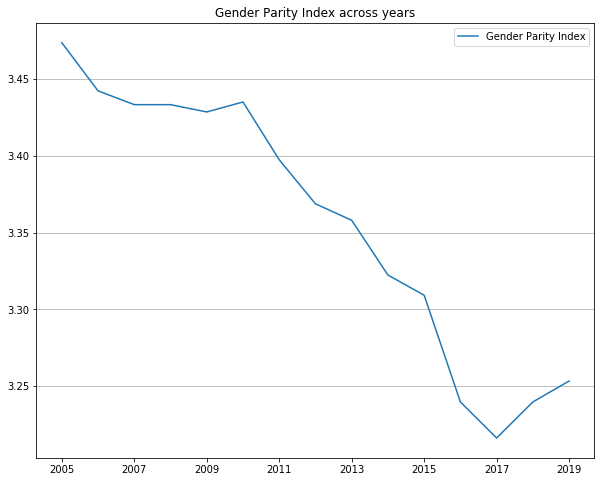

In [147]:
# Line plot 
figsize = (10, 8)
ax = gender_world_data.plot(kind="line", figsize = figsize)
ax.grid(axis="y")
ax.set_title("Gender Parity Index across years")
ax.legend(["Gender Parity Index"])
plt.show()

In [163]:
# Economic Growth 
economic_growth_mask = df["Indicator Code"] == economic_growth_indicator
economic_growth_world_data = df[economic_growth_mask & world_mask][years].T

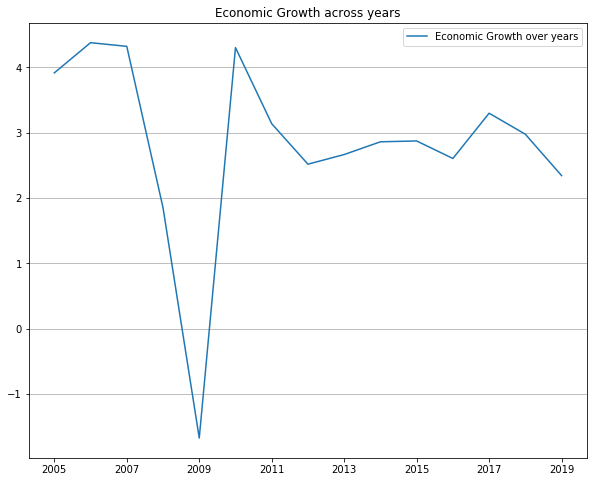

In [167]:
# Line plot 
figsize = (10, 8)
ax = economic_growth_world_data.plot(kind="line", figsize = figsize)
ax.grid(axis="y")
ax.set_title("Economic Growth across years")
ax.legend(["Economic Growth over years"])
plt.show()

In [173]:
# Education Distribution 
education_mask = df["Indicator Code"] == education_indicator
education_mask_mask_world_data = df[education_mask & world_mask][years].T

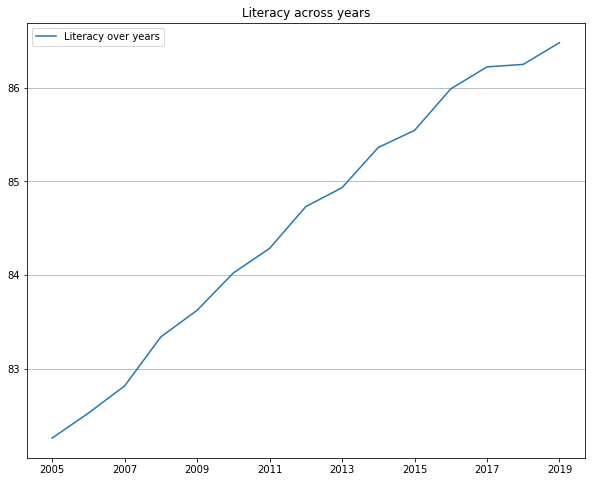

In [175]:
# Line plot 
figsize = (10, 8)
ax = education_mask_mask_world_data.plot(kind="line", figsize = figsize)
ax.grid(axis="y")
ax.set_title("Literacy across years")
ax.legend(["Literacy over years"])
plt.show()